In [1]:
library(forecast)
library(fpp2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: ggplot2

Loading required package: fma

Loading required package: expsmooth



In [3]:
start(ausair)
end(ausair)

[1] 1970    1

[1] 2016    1

In [4]:
aus_train<-window(ausair, start=1970, end=2010)
aus_test<-window(ausair, start=2011)

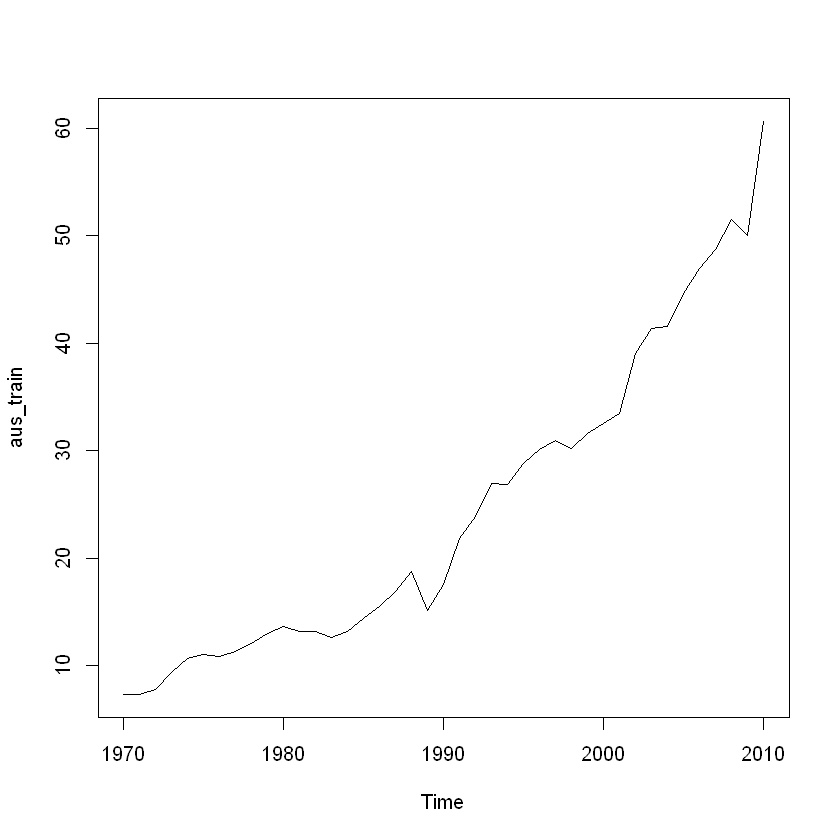

In [5]:
plot(aus_train)

In [7]:
#대칭이동평균 order가 홀수일 때 -대칭이동평균
ma(aus_train, order=3)

A Time Series:
 [1]        NA  7.480300  8.168933  9.281633 10.368133 10.861367 11.075300
 [8] 11.431033 12.150433 12.931200 13.296933 13.352067 13.002967 13.008733
[15] 13.416800 14.382067 15.596533 17.064600 16.936933 17.161333 18.175933
[22] 21.100033 24.225333 25.901467 27.549733 28.598333 29.953333 30.404767
[29] 30.906300 31.447656 32.544889 35.025516 37.961804 40.668188 42.546769
[36] 44.401884 46.779312 49.056346 50.081410 54.052102        NA

In [10]:
# 대칭이동평균 order가 짝수일때-중심화이동평균
ma(aus_train, order=4, centre=TRUE)

A Time Series:
 [1]        NA        NA  8.374625  9.258938 10.108587 10.732413 11.154850
 [8] 11.582975 12.176963 12.764150 13.136475 13.217050 13.112925 13.210500
[15] 13.648250 14.471763 15.704038 16.489250 16.834037 17.713537 18.969812
[22] 21.080475 23.724238 25.762538 27.407513 28.684100 29.599275 30.354962
[29] 31.011309 31.639604 33.059577 35.389903 37.743118 40.267981 42.656746
[36] 44.565821 46.720106 48.627796 51.010144        NA        NA

In [11]:
#전통적인 분해법 -> 연도별 데이터는 안 됨!!!
#가법모형 : 홀트-윈터스 가법모형처럼 일정한 그래프를 보일 때
decompose(aus_train, type='additive', )

ERROR: Error in decompose(aus_train, type = "additive"): time series has no or less than 2 periods


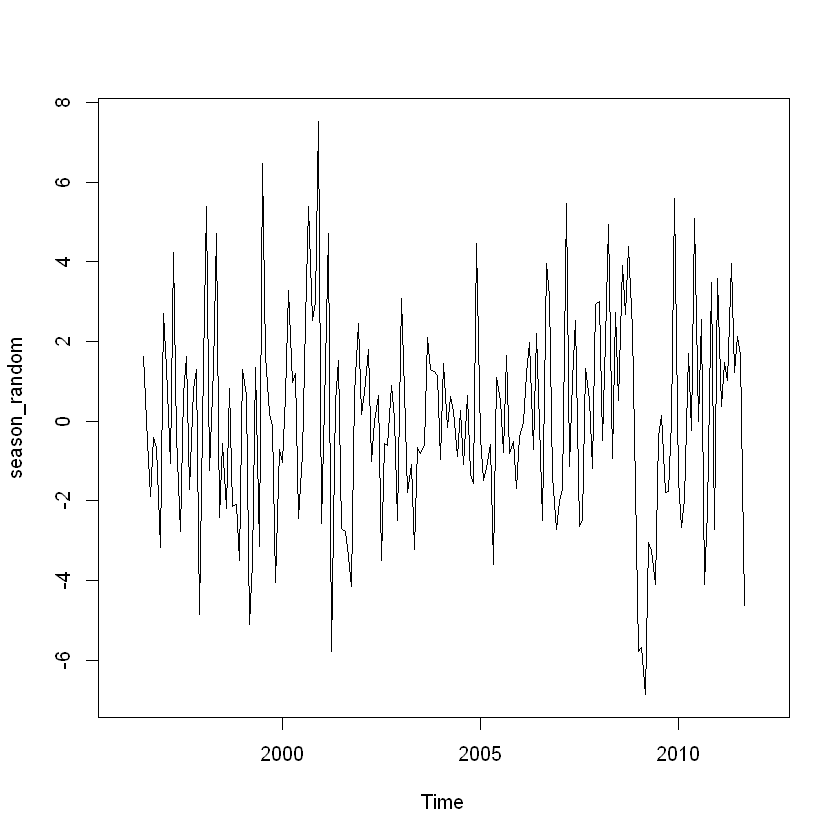

In [21]:
elec_de<-decompose(elecequip, type='additive')
season_random<-elec_de$x-elec_de$trend-elec_de$seasonal
plot(season_random)

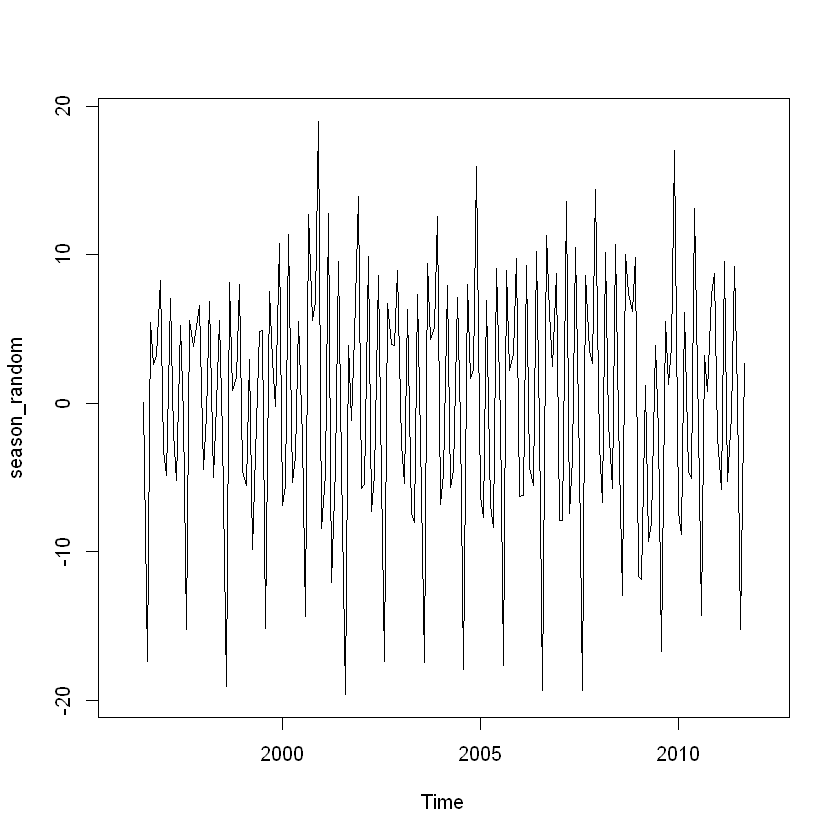

In [22]:
season_random<-elec_de$x-elec_de$trend
plot(season_random)

In [23]:
elec_de$seasonal
elec_de$figure # 월별 성분!

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
1997,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
1998,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
1999,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2000,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2001,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2002,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2003,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2004,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2005,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504


[1]  -5.887662  -6.199273   8.083171  -6.314968  -4.818468   7.976088
 [7]  -1.575338 -16.870416   7.304324   3.007671   3.847366  11.447504

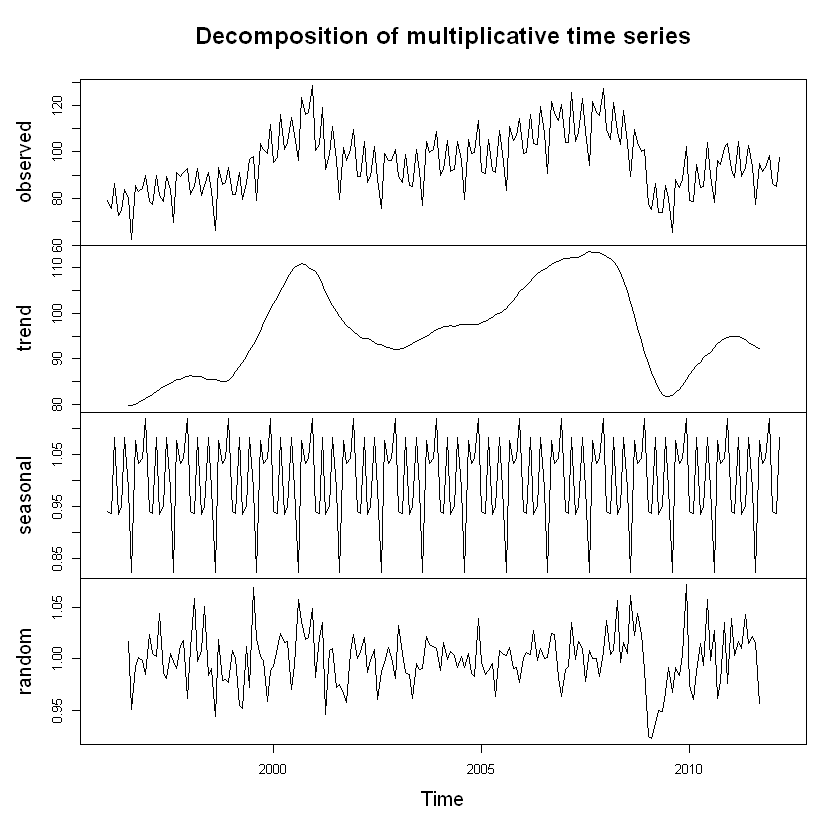

In [18]:
# 승법모형
elec_de2<-decompose(elecequip, type='multiplicative')
